# Aspect Term Extraction and Sentiment Classification
Drafted for v2.0 and higher versions. Note there are many breaking changes in v2.0, so you do not need to upgrade to v2.0 and higher versions if you are using code, API, checkpoints, datasets or anything from v1.0. Let's begin the introduction.

In [1]:
!pip install pyabsa -U
from pyabsa import AspectTermExtraction as ATEPC

C:\Users\chuan\miniconda3\lib\site-packages\flatbuffers\compat.py:19: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
C:\Users\chuan\AppData\Roaming\Python\Python39\site-packages\torch\utils\tensorboard\__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


[2023-02-22 23:49:48] (2.0.29a0) PyABSA(2.0.29a0): If you find any problems, please report them on GitHub. Thanks!
The v2.x versions are not compatible with Google Colab. Please downgrade to 1.16.27.


C:\Users\chuan\miniconda3\lib\multiprocessing\pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=1>
  _warn(f"unclosed running multiprocessing pool {self!r}",


# Training Stage

# Get a configuration
There are three types of APC models for aspect term extraction, which are based on the local context focus mechanism
Notice: when you select to use a model, please make sure to carefully manage the configurations, e.g., for glove-based models, you need to set hidden dim and embed_dim manually.
We already provide some pre-defined configurations. Refer to the source code if you have any question
e.g.,

In [2]:
config = (
    ATEPC.ATEPCConfigManager.get_atepc_config_english()
)  # this config contains 'pretrained_bert', it is based on pretrained models

# Set the model

In [3]:
config.model = ATEPC.ATEPCModelList.FAST_LCF_ATEPC  # improved version of LCF-ATEPC


# Set the dataset
There are the [datasets](https://github.com/yangheng95/ABSADatasets) from publication or third-party contribution. There dataset can be downloaded and processed automatically.
In pyabsa, you can pass a set of datasets to train a model.
e.g., for using integrated datasets:


In [4]:
from pyabsa import DatasetItem

dataset = ATEPC.ATEPCDatasetList.Restaurant14
# now the dataset is a DatasetItem object, which has a name and a list of subdatasets
# e.g., SemEval dataset contains Laptop14, Restaurant14, Restaurant16 datasets

# or you can pass a list of datasets
# my_dataset = DatasetItem("my_dataset", ["my_dataset1", "my_dataset2", ATEPC.ATEPCDatasetList.Restaurant14])
# my_dataset1 and my_dataset2 are the dataset folders. In there folders, the train dataset is necessary

You can use your own dataset provided that it is formatted according to [ABSADatasets](https://github.com/yangheng95/ABSADatasets#important-rename-your-dataset-filename-before-use-it-in-pyabsa)

In [5]:
# Put your dataset into integrated_datasets folder, it this folder does not exist, you need to call:
from pyabsa import download_all_available_datasets

download_all_available_datasets()

[2023-02-22 23:49:48] (2.0.29a0) Datasets already exist in C:\Users\chuan\OneDrive - University of Exeter\AIProjects\PyABSA\examples-v2\aspect_term_extraction\integrated_datasets, skip download


# Start training

In [6]:
from pyabsa import ModelSaveOption, DeviceTypeOption
import warnings

warnings.filterwarnings("ignore")

config.batch_size = 16
config.patience = 1
config.log_step = -1
config.seed = [1, 2, 3]
config.verbose = False  # If verbose == True, PyABSA will output the model strcture and seversal processed data examples
config.notice = (
    "This is an training example for aspect term extraction"  # for memos usage
)

trainer = ATEPC.ATEPCTrainer(
    config=config,
    dataset=dataset,
    from_checkpoint="english",  # if you want to resume training from our pretrained checkpoints, you can pass the checkpoint name here
    auto_device=DeviceTypeOption.AUTO,  # use cuda if available
    checkpoint_save_mode=ModelSaveOption.SAVE_MODEL_STATE_DICT,  # save state dict only instead of the whole model
    load_aug=False,  # there are some augmentation dataset for integrated datasets, you use them by setting load_aug=True to improve performance
)

[2023-02-22 23:49:48] (2.0.29a0) Set Model Device: cuda:0
[2023-02-22 23:49:48] (2.0.29a0) Device Name: NVIDIA GeForce RTX 3070
2023-02-22 23:49:49,248 INFO: PyABSA version: 2.0.29a0
2023-02-22 23:49:49,251 INFO: Transformers version: 4.25.1
2023-02-22 23:49:49,252 INFO: Torch version: 2.0.0.dev20221210+cu117+cuda11.7
2023-02-22 23:49:49,253 INFO: Device: NVIDIA GeForce RTX 3070
2023-02-22 23:49:49,261 INFO: Searching dataset 114.Restaurant14 in local disk
2023-02-22 23:49:49,342 INFO: You can set load_aug=True in a trainer to augment your dataset (English only yet) and improve performance.
2023-02-22 23:49:49,343 INFO: Please use a new folder to perform new text augment if the former augment in integrated_datasets\atepc_datasets\110.SemEval\114.restaurant14 errored unexpectedly


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
convert examples to features:  17%|█▋        | 631/3608 [00:01<00:04, 607.11it/s]

2023-02-22 23:49:52,202 WARNING: AspectTooLongWarning -> <aspect: fried mini buns with the condensed milk and the assorted fruits on beancurd> is too long, <text: The waitress remembers me and is very friendly , she knows what my regular is and that ' s the fried mini buns with the condensed milk and the assorted fruits on beancurd .>, <polarity: Positive>


convert examples to features:  47%|████▋     | 1687/3608 [00:03<00:03, 582.13it/s]

2023-02-22 23:49:54,209 WARNING: AspectTooLongWarning -> <aspect: salad with perfectly marinated cucumbers and tomatoes with lots of shrimp and basil> is too long, <text: I ate clams oreganta and spectacular salad with perfectly marinated cucumbers and tomatoes with lots of shrimp and basil .>, <polarity: Positive>


convert examples to features:  55%|█████▍    | 1977/3608 [00:03<00:03, 534.34it/s]

2023-02-22 23:49:54,787 WARNING: AspectTooLongWarning -> <aspect: Godmother pizza ( a sort of traditional flat pizza with an olive oil - brushed crust and less tomato sauce than usual )> is too long, <text: But they ' ve done a really nice job of offering all the typical pizzeria faves plus some terrific specials like the Godmother pizza ( a sort of traditional flat pizza with an olive oil - brushed crust and less tomato sauce than usual ) .>, <polarity: Positive>


convert examples to features:  91%|█████████ | 3285/3608 [00:05<00:00, 578.76it/s]

2023-02-22 23:49:57,006 WARNING: AspectTooLongWarning -> <aspect: egg noodles in the beef broth with shrimp dumplings and slices of BBQ roast pork> is too long, <text: I fell in love with the egg noodles in the beef broth with shrimp dumplings and slices of BBQ roast pork .>, <polarity: Positive>


convert examples to features: 100%|██████████| 3608/3608 [00:06<00:00, 552.61it/s]

2023-02-22 23:49:57,593 INFO: Dataset Label Details: {'Neutral': 637, 'Negative': 807, 'Positive': 2160, 'Sum': 3604}



convert examples to features:  52%|█████▏    | 577/1120 [00:00<00:00, 641.52it/s]

2023-02-22 23:49:59,030 WARNING: AspectTooLongWarning -> <aspect: Mediterranean salads - - layered with beets , goat cheese and walnuts> is too long, <text: Generously garnished , organic grilled burgers are the most popular dish , but the Jerusalem market - style falafel wraps and Mediterranean salads - - layered with beets , goat cheese and walnuts - - are equally scrumptious .>, <polarity: Positive>


convert examples to features:  97%|█████████▋| 1081/1120 [00:01<00:00, 559.61it/s]

2023-02-22 23:49:59,987 WARNING: AspectTooLongWarning -> <aspect: Greek yogurt ( with cuccumber , dill , and garlic )> is too long, <text: Creamy appetizers - - taramasalata , eggplant salad , and Greek yogurt ( with cuccumber , dill , and garlic ) taste excellent when on warm pitas .>, <polarity: Positive>


convert examples to features: 100%|██████████| 1120/1120 [00:01<00:00, 607.24it/s]

2023-02-22 23:49:59,989 INFO: Dataset Label Details: {'Neutral': 196, 'Negative': 196, 'Positive': 726, 'Sum': 1118}



Some weights of the model checkpoint at microsoft/deberta-v3-base were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.weight', 'mask_predictions.dense.bias', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


2023-02-22 23:50:01,482 INFO: Save cache dataset to fast_lcf_atepc.Restaurant14.dataset.de61bcf6c59393d01f777c9498ce9887d4b2882f0c8128d20725b491be38d12e.cache
2023-02-22 23:50:01,792 INFO: cuda memory allocated:764963840
2023-02-22 23:50:01,792 INFO: ABSADatasetsVersion:None	-->	Calling Count:0
2023-02-22 23:50:01,793 INFO: IOB_label_to_index:{'B-ASP': 1, 'I-ASP': 2, 'O': 3, '[CLS]': 4, '[SEP]': 5}	-->	Calling Count:1
2023-02-22 23:50:01,794 INFO: MV:<metric_visualizer.metric_visualizer.MetricVisualizer object at 0x000001B7B5EEB4F0>	-->	Calling Count:0
2023-02-22 23:50:01,794 INFO: PyABSAVersion:2.0.29a0	-->	Calling Count:1
2023-02-22 23:50:01,794 INFO: SRD:3	-->	Calling Count:9444
2023-02-22 23:50:01,795 INFO: TorchVersion:2.0.0.dev20221210+cu117+cuda11.7	-->	Calling Count:1
2023-02-22 23:50:01,796 INFO: TransformersVersion:4.25.1	-->	Calling Count:1
2023-02-22 23:50:01,796 INFO: auto_device:True	-->	Calling Count:3
2023-02-22 23:50:01,796 INFO: batch_size:16	-->	Calling Count:4
2023-

Epoch:  0| loss_apc:0.0203 | loss_ate:0.0872 |: 100%|██████████| 226/226 [02:19<00:00,  1.62it/s,  APC_ACC: 87.48(max:88.01) | APC_F1: 81.41(max:82.24) | ATE_F1: 81.89(max:83.01)]


2023-02-22 23:52:36,306 INFO: 
-------------------------------------------------------------------- Metric Visualizer --------------------------------------------------------------------
╒════════════════════════════════╤═══════════════════════════════════════════════════════╤══════════╤═══════════╤══════════╤═══════╤═══════╤═══════╤═══════╕
│ Metric                         │ Trial                                                 │ Values   │  Average  │  Median  │  Std  │  IQR  │  Min  │  Max  │
╞════════════════════════════════╪═══════════════════════════════════════════════════════╪══════════╪═══════════╪══════════╪═══════╪═══════╪═══════╪═══════╡
│ Max-APC-Test-Acc w/o Valid Set │ fast_lcf_atepc-Restaurant14-microsoft/deberta-v3-base │ [88.01]  │   88.01   │  88.01   │   0   │   0   │ 88.01 │ 88.01 │
├────────────────────────────────┼───────────────────────────────────────────────────────┼──────────┼───────────┼──────────┼───────┼───────┼───────┼───────┤
│ Max-APC-Test-F1 w/o Valid 

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
convert examples to features:  17%|█▋        | 600/3608 [00:01<00:05, 593.12it/s]

2023-02-22 23:52:42,037 WARNING: AspectTooLongWarning -> <aspect: fried mini buns with the condensed milk and the assorted fruits on beancurd> is too long, <text: The waitress remembers me and is very friendly , she knows what my regular is and that ' s the fried mini buns with the condensed milk and the assorted fruits on beancurd .>, <polarity: Positive>


convert examples to features:  48%|████▊     | 1727/3608 [00:03<00:03, 574.56it/s]

2023-02-22 23:52:44,155 WARNING: AspectTooLongWarning -> <aspect: salad with perfectly marinated cucumbers and tomatoes with lots of shrimp and basil> is too long, <text: I ate clams oreganta and spectacular salad with perfectly marinated cucumbers and tomatoes with lots of shrimp and basil .>, <polarity: Positive>


convert examples to features:  56%|█████▌    | 2016/3608 [00:03<00:02, 547.68it/s]

2023-02-22 23:52:44,705 WARNING: AspectTooLongWarning -> <aspect: Godmother pizza ( a sort of traditional flat pizza with an olive oil - brushed crust and less tomato sauce than usual )> is too long, <text: But they ' ve done a really nice job of offering all the typical pizzeria faves plus some terrific specials like the Godmother pizza ( a sort of traditional flat pizza with an olive oil - brushed crust and less tomato sauce than usual ) .>, <polarity: Positive>


convert examples to features:  91%|█████████ | 3276/3608 [00:05<00:00, 571.38it/s]

2023-02-22 23:52:46,942 WARNING: AspectTooLongWarning -> <aspect: egg noodles in the beef broth with shrimp dumplings and slices of BBQ roast pork> is too long, <text: I fell in love with the egg noodles in the beef broth with shrimp dumplings and slices of BBQ roast pork .>, <polarity: Positive>


convert examples to features: 100%|██████████| 3608/3608 [00:06<00:00, 548.83it/s]

2023-02-22 23:52:47,523 INFO: Dataset Label Details: {'Neutral': 637, 'Negative': 807, 'Positive': 2160, 'Sum': 3604}



convert examples to features:  52%|█████▏    | 580/1120 [00:00<00:00, 662.33it/s]

2023-02-22 23:52:48,942 WARNING: AspectTooLongWarning -> <aspect: Mediterranean salads - - layered with beets , goat cheese and walnuts> is too long, <text: Generously garnished , organic grilled burgers are the most popular dish , but the Jerusalem market - style falafel wraps and Mediterranean salads - - layered with beets , goat cheese and walnuts - - are equally scrumptious .>, <polarity: Positive>


convert examples to features:  97%|█████████▋| 1081/1120 [00:01<00:00, 560.27it/s]

2023-02-22 23:52:49,927 WARNING: AspectTooLongWarning -> <aspect: Greek yogurt ( with cuccumber , dill , and garlic )> is too long, <text: Creamy appetizers - - taramasalata , eggplant salad , and Greek yogurt ( with cuccumber , dill , and garlic ) taste excellent when on warm pitas .>, <polarity: Positive>


convert examples to features: 100%|██████████| 1120/1120 [00:01<00:00, 603.60it/s]

2023-02-22 23:52:49,929 INFO: Dataset Label Details: {'Neutral': 196, 'Negative': 196, 'Positive': 726, 'Sum': 1118}



Some weights of the model checkpoint at microsoft/deberta-v3-base were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.weight', 'mask_predictions.dense.bias', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


2023-02-22 23:52:51,324 INFO: Save cache dataset to fast_lcf_atepc.Restaurant14.dataset.538a6f762e16ac9e41de2c1dc43621ac6b5bb598d3b53e715ea1db6ae2af70c0.cache
2023-02-22 23:52:51,636 INFO: cuda memory allocated:776236032
2023-02-22 23:52:51,636 INFO: ABSADatasetsVersion:None	-->	Calling Count:0
2023-02-22 23:52:51,637 INFO: IOB_label_to_index:{'B-ASP': 1, 'I-ASP': 2, 'O': 3, '[CLS]': 4, '[SEP]': 5}	-->	Calling Count:2
2023-02-22 23:52:51,637 INFO: MV:<metric_visualizer.metric_visualizer.MetricVisualizer object at 0x000001B7B5EEB4F0>	-->	Calling Count:5
2023-02-22 23:52:51,638 INFO: PyABSAVersion:2.0.29a0	-->	Calling Count:1
2023-02-22 23:52:51,638 INFO: SRD:3	-->	Calling Count:18888
2023-02-22 23:52:51,639 INFO: TorchVersion:2.0.0.dev20221210+cu117+cuda11.7	-->	Calling Count:1
2023-02-22 23:52:51,639 INFO: TransformersVersion:4.25.1	-->	Calling Count:1
2023-02-22 23:52:51,640 INFO: auto_device:True	-->	Calling Count:231
2023-02-22 23:52:51,640 INFO: batch_size:16	-->	Calling Count:10
2

Epoch:  0| loss_apc:0.1106 | loss_ate:0.0045 |: 100%|██████████| 226/226 [02:21<00:00,  1.60it/s,  APC_ACC: 88.01(max:88.01) | APC_F1: 82.43(max:82.43) | ATE_F1: 84.62(max:84.62)]


2023-02-22 23:55:26,078 INFO: 
----------------------------------------------------------------------- Metric Visualizer -----------------------------------------------------------------------
╒════════════════════════════════╤═══════════════════════════════════════════════════════╤════════════════╤═══════════╤══════════╤═══════╤═══════╤═══════╤═══════╕
│ Metric                         │ Trial                                                 │ Values         │  Average  │  Median  │  Std  │  IQR  │  Min  │  Max  │
╞════════════════════════════════╪═══════════════════════════════════════════════════════╪════════════════╪═══════════╪══════════╪═══════╪═══════╪═══════╪═══════╡
│ Max-APC-Test-Acc w/o Valid Set │ fast_lcf_atepc-Restaurant14-microsoft/deberta-v3-base │ [88.01, 88.01] │   88.01   │  88.01   │   0   │   0   │ 88.01 │ 88.01 │
├────────────────────────────────┼───────────────────────────────────────────────────────┼────────────────┼───────────┼──────────┼───────┼───────┼───────┼─

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
convert examples to features:  17%|█▋        | 606/3608 [00:01<00:05, 591.89it/s]

2023-02-22 23:55:31,735 WARNING: AspectTooLongWarning -> <aspect: fried mini buns with the condensed milk and the assorted fruits on beancurd> is too long, <text: The waitress remembers me and is very friendly , she knows what my regular is and that ' s the fried mini buns with the condensed milk and the assorted fruits on beancurd .>, <polarity: Positive>


convert examples to features:  47%|████▋     | 1679/3608 [00:03<00:03, 531.88it/s]

2023-02-22 23:55:33,832 WARNING: AspectTooLongWarning -> <aspect: salad with perfectly marinated cucumbers and tomatoes with lots of shrimp and basil> is too long, <text: I ate clams oreganta and spectacular salad with perfectly marinated cucumbers and tomatoes with lots of shrimp and basil .>, <polarity: Positive>


convert examples to features:  56%|█████▌    | 2025/3608 [00:03<00:02, 570.97it/s]

2023-02-22 23:55:34,375 WARNING: AspectTooLongWarning -> <aspect: Godmother pizza ( a sort of traditional flat pizza with an olive oil - brushed crust and less tomato sauce than usual )> is too long, <text: But they ' ve done a really nice job of offering all the typical pizzeria faves plus some terrific specials like the Godmother pizza ( a sort of traditional flat pizza with an olive oil - brushed crust and less tomato sauce than usual ) .>, <polarity: Positive>


convert examples to features:  91%|█████████ | 3274/3608 [00:06<00:00, 417.27it/s]

2023-02-22 23:55:36,813 WARNING: AspectTooLongWarning -> <aspect: egg noodles in the beef broth with shrimp dumplings and slices of BBQ roast pork> is too long, <text: I fell in love with the egg noodles in the beef broth with shrimp dumplings and slices of BBQ roast pork .>, <polarity: Positive>


convert examples to features: 100%|██████████| 3608/3608 [00:06<00:00, 537.96it/s]

2023-02-22 23:55:37,352 INFO: Dataset Label Details: {'Neutral': 637, 'Negative': 807, 'Positive': 2160, 'Sum': 3604}



convert examples to features:  52%|█████▏    | 587/1120 [00:00<00:00, 681.27it/s]

2023-02-22 23:55:38,741 WARNING: AspectTooLongWarning -> <aspect: Mediterranean salads - - layered with beets , goat cheese and walnuts> is too long, <text: Generously garnished , organic grilled burgers are the most popular dish , but the Jerusalem market - style falafel wraps and Mediterranean salads - - layered with beets , goat cheese and walnuts - - are equally scrumptious .>, <polarity: Positive>


convert examples to features: 100%|█████████▉| 1116/1120 [00:01<00:00, 451.12it/s]

2023-02-22 23:55:39,822 WARNING: AspectTooLongWarning -> <aspect: Greek yogurt ( with cuccumber , dill , and garlic )> is too long, <text: Creamy appetizers - - taramasalata , eggplant salad , and Greek yogurt ( with cuccumber , dill , and garlic ) taste excellent when on warm pitas .>, <polarity: Positive>


convert examples to features: 100%|██████████| 1120/1120 [00:01<00:00, 579.27it/s]

2023-02-22 23:55:39,824 INFO: Dataset Label Details: {'Neutral': 196, 'Negative': 196, 'Positive': 726, 'Sum': 1118}



Some weights of the model checkpoint at microsoft/deberta-v3-base were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.weight', 'mask_predictions.dense.bias', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


2023-02-22 23:55:41,319 INFO: Save cache dataset to fast_lcf_atepc.Restaurant14.dataset.4e58c2d7d85a80a6400e1c4813431b0734abb663a2e4f86529ad0e3998b2d975.cache
2023-02-22 23:55:41,614 INFO: cuda memory allocated:776236032
2023-02-22 23:55:41,615 INFO: ABSADatasetsVersion:None	-->	Calling Count:0
2023-02-22 23:55:41,615 INFO: IOB_label_to_index:{'B-ASP': 1, 'I-ASP': 2, 'O': 3, '[CLS]': 4, '[SEP]': 5}	-->	Calling Count:3
2023-02-22 23:55:41,616 INFO: MV:<metric_visualizer.metric_visualizer.MetricVisualizer object at 0x000001B7B5EEB4F0>	-->	Calling Count:10
2023-02-22 23:55:41,616 INFO: PyABSAVersion:2.0.29a0	-->	Calling Count:1
2023-02-22 23:55:41,617 INFO: SRD:3	-->	Calling Count:28332
2023-02-22 23:55:41,617 INFO: TorchVersion:2.0.0.dev20221210+cu117+cuda11.7	-->	Calling Count:1
2023-02-22 23:55:41,618 INFO: TransformersVersion:4.25.1	-->	Calling Count:1
2023-02-22 23:55:41,618 INFO: auto_device:True	-->	Calling Count:459
2023-02-22 23:55:41,619 INFO: batch_size:16	-->	Calling Count:16


Epoch:  0| loss_apc:0.0058 | loss_ate:0.0365 |: 100%|██████████| 226/226 [02:16<00:00,  1.66it/s,  APC_ACC: 86.49(max:88.46) | APC_F1: 79.38(max:83.83) | ATE_F1: 84.83(max:85.68)]


2023-02-22 23:58:11,098 INFO: 
--------------------------------------------------------------------------- Metric Visualizer ---------------------------------------------------------------------------
╒════════════════════════════════╤═══════════════════════════════════════════════════════╤═══════════════════════╤═══════════╤══════════╤═══════╤═══════╤═══════╤═══════╕
│ Metric                         │ Trial                                                 │ Values                │  Average  │  Median  │  Std  │  IQR  │  Min  │  Max  │
╞════════════════════════════════╪═══════════════════════════════════════════════════════╪═══════════════════════╪═══════════╪══════════╪═══════╪═══════╪═══════╪═══════╡
│ Max-APC-Test-Acc w/o Valid Set │ fast_lcf_atepc-Restaurant14-microsoft/deberta-v3-base │ [88.01, 88.01, 88.46] │   88.16   │  88.01   │ 0.21  │ 0.22  │ 88.01 │ 88.46 │
├────────────────────────────────┼───────────────────────────────────────────────────────┼───────────────────────┼─────

## Visualizations

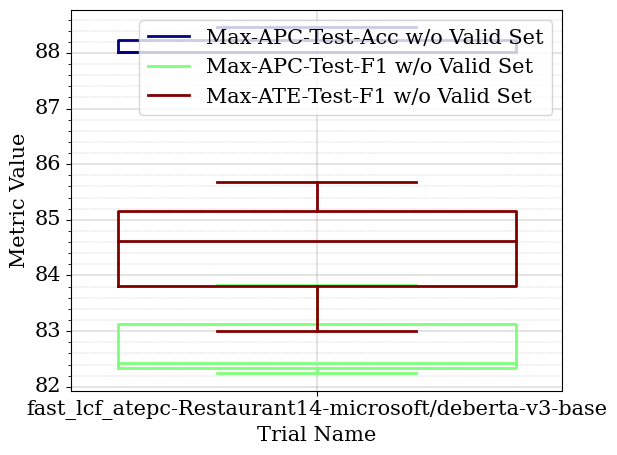

In [7]:
config.MV.box_plot(no_overlap=False)
# need to fine-tune visualization parameters, see the doc of metric-visualizer

to load trained model for inference:

In [8]:
aspect_extractor = trainer.load_trained_model()
assert isinstance(aspect_extractor, ATEPC.AspectExtractor)

[2023-02-22 23:58:14] (2.0.29a0) Load aspect extractor from checkpoints/fast_lcf_atepc_Restaurant14_cdw_apcacc_88.46_apcf1_83.83_atef1_85.68
[2023-02-22 23:58:14] (2.0.29a0) config: checkpoints/fast_lcf_atepc_Restaurant14_cdw_apcacc_88.46_apcf1_83.83_atef1_85.68\fast_lcf_atepc.config
[2023-02-22 23:58:14] (2.0.29a0) state_dict: checkpoints/fast_lcf_atepc_Restaurant14_cdw_apcacc_88.46_apcf1_83.83_atef1_85.68\fast_lcf_atepc.state_dict
[2023-02-22 23:58:14] (2.0.29a0) model: None
[2023-02-22 23:58:14] (2.0.29a0) tokenizer: checkpoints/fast_lcf_atepc_Restaurant14_cdw_apcacc_88.46_apcf1_83.83_atef1_85.68\fast_lcf_atepc.tokenizer
[2023-02-22 23:58:14] (2.0.29a0) Set Model Device: cuda:0
[2023-02-22 23:58:14] (2.0.29a0) Device Name: NVIDIA GeForce RTX 3070


Some weights of the model checkpoint at microsoft/deberta-v3-base were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.weight', 'mask_predictions.dense.bias', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have b

# Inference Stage

## Use our checkpoints to initialize a AspectExtractor and SentimentClassifier

In [9]:
from pyabsa import available_checkpoints

ckpts = available_checkpoints(
    show_ckpts=True
)  # This will show the available checkpoints and their detailed informantion
# find a suitable checkpoint and use the name:
aspect_extractor = ATEPC.AspectExtractor(
    checkpoint="english"
)  # here I use the english checkpoint which is trained on all English datasets in PyABSA

[2023-02-22 23:58:17] (2.0.29a0) Please specify the task code, e.g. from pyabsa import TaskCodeOption
[2023-02-22 23:58:18] (2.0.29a0) Load aspect extractor from checkpoints\ATEPC_ENGLISH_CHECKPOINT\fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43
[2023-02-22 23:58:18] (2.0.29a0) config: checkpoints\ATEPC_ENGLISH_CHECKPOINT\fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43\fast_lcf_atepc.config
[2023-02-22 23:58:18] (2.0.29a0) state_dict: checkpoints\ATEPC_ENGLISH_CHECKPOINT\fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43\fast_lcf_atepc.state_dict
[2023-02-22 23:58:18] (2.0.29a0) model: None
[2023-02-22 23:58:18] (2.0.29a0) tokenizer: checkpoints\ATEPC_ENGLISH_CHECKPOINT\fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43\fast_lcf_atepc.tokenizer
[2023-02-22 23:58:18] (2.0.29a0) Set Model Device: cuda:0
[2023-02-22 23:58:18] (2.0.29a0) Device Name: NVIDIA GeForce RTX 3070


Some weights of the model checkpoint at microsoft/deberta-v3-base were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.weight', 'mask_predictions.dense.bias', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have b

## Simple Inference

In [10]:
atepc_examples = [
    "But the staff was so nice to us .",
    "But the staff was so horrible to us .",
    r"Not only was the food outstanding , but the little ` perks \' were great .",
    "It took half an hour to get our check , which was perfect since we could sit , have drinks and talk !",
    "It was pleasantly uncrowded , the service was delightful , the garden adorable , "
    "the food -LRB- from appetizers to entrees -RRB- was delectable .",
    "How pretentious and inappropriate for MJ Grill to claim that it provides power lunch and dinners !",
]
# predict interface accepts a list of example or a single example
for ex in atepc_examples:
    result = aspect_extractor.predict(
        text=ex,
        print_result=True,
        ignore_error=True,  # ignore an invalid example, if it is False, invalid examples will raise Exceptions
        eval_batch_size=32,
    )

[2023-02-22 23:58:22] (2.0.29a0) The results of aspect term extraction have been saved in C:\Users\chuan\OneDrive - University of Exeter\AIProjects\PyABSA\examples-v2\aspect_term_extraction\Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2023-02-22 23:58:22] (2.0.29a0) Example 0: But the <staff:Positive Confidence:0.9995> was so nice to us .
[2023-02-22 23:58:22] (2.0.29a0) The results of aspect term extraction have been saved in C:\Users\chuan\OneDrive - University of Exeter\AIProjects\PyABSA\examples-v2\aspect_term_extraction\Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2023-02-22 23:58:22] (2.0.29a0) Example 0: But the <staff:Negative Confidence:0.9985> was so horrible to us .
[2023-02-22 23:58:24] (2.0.29a0) The results of aspect term extraction have been saved in C:\Users\chuan\OneDrive - University of Exeter\AIProjects\PyABSA\examples-v2\aspect_term_extraction\Aspect Term Extraction and Polarity Classification.FAST_

## Batch Inference

In [11]:
aspect_extractor.batch_predict(
    target_file=ATEPC.ATEPCDatasetList.Restaurant16,
    print_result=True,
    save_result=False,
    ignore_error=True,
    eval_batch_size=32,
)

[2023-02-22 23:58:26] (2.0.29a0) Try to load 116.Restaurant16 dataset from local disk
[2023-02-22 23:58:27] (2.0.29a0) loading: integrated_datasets\apc_datasets\110.SemEval\116.restaurant16\restaurant_test.raw.inference


classifying aspect sentiments: 100%|██████████| 23/23 [00:14<00:00,  1.63it/s]


[2023-02-22 23:58:52] (2.0.29a0) Example 0: serves really good <sushi:Positive Confidence:0.9919> .
[2023-02-22 23:58:52] (2.0.29a0) Example 1: not the biggest <portions:Negative Confidence:0.9795> but adequate .
[2023-02-22 23:58:52] (2.0.29a0) Example 2: green tea creme brulee is a must !
[2023-02-22 23:58:52] (2.0.29a0) Example 3:   – i ca n ' t say enough about <this:Positive Confidence:0.9955> place .
[2023-02-22 23:58:52] (2.0.29a0) Example 4: it has great <sushi:Positive Confidence:0.9995> and even better <service:Positive Confidence:0.9995> .
[2023-02-22 23:58:52] (2.0.29a0) Example 5: the entire <staff:Positive Confidence:0.9995> was extremely accomodating and tended to my every need .
[2023-02-22 23:58:52] (2.0.29a0) Example 6: i ' ve been to this <restaurant:Positive Confidence:0.9987> over a dozen times with no complaints to date .
[2023-02-22 23:58:52] (2.0.29a0) Example 7: the <owner:Negative Confidence:0.9985> is belligerent to guests that have a complaint .
[2023-02-22 

[{'sentence': 'serves really good sushi .',
  'IOB': ['B-ASP', 'O', 'O', 'B-ASP', 'O'],
  'tokens': ['serves', 'really', 'good', 'sushi', '.'],
  'aspect': ['serves', 'sushi'],
  'position': [[1], [4]],
  'sentiment': ['Neutral', 'Positive'],
  'probs': [[0.0004788661899510771, 0.6750665307044983, 0.3244546353816986],
   [0.0002311569405719638, 0.007874456234276295, 0.9918943047523499]],
  'confidence': [0.6751, 0.9919]},
 {'sentence': 'not the biggest portions but adequate .',
  'IOB': ['O', 'O', 'O', 'B-ASP', 'O', 'O', 'O'],
  'tokens': ['not', 'the', 'biggest', 'portions', 'but', 'adequate', '.'],
  'aspect': ['portions'],
  'position': [[4]],
  'sentiment': ['Negative'],
  'probs': [[0.979500949382782, 0.00579943647608161, 0.014699668623507023]],
  'confidence': [0.9795]},
 {'sentence': 'green tea creme brulee is a must !',
  'IOB': ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
  'tokens': ['green', 'tea', 'creme', 'brulee', 'is', 'a', 'must', '!'],
  'aspect': [],
  'position': [],
  

# Annotate your own datasets based on PyABSA
[Auto-Annotation](https://github.com/yangheng95/ABSADatasets#auto-annoate-your-datasets-via-pyabsa)  # available for v1.0 currently
[Manually-Annotation](https://github.com/yangheng95/ABSADatasets/tree/v1.2/DPT)

# Deploy a ATEPC demo
Here is a simple web-based demo for aspect term extraction


In [12]:
import os
import random
import gradio as gr
import pandas as pd
import requests

from pyabsa import (
    download_all_available_datasets,
    AspectTermExtraction as ATEPC,
    TaskCodeOption,
)
from pyabsa.utils.data_utils.dataset_manager import detect_infer_dataset

download_all_available_datasets()

dataset_items = {dataset.name: dataset for dataset in ATEPC.ATEPCDatasetList()}


def get_example(dataset):
    task = TaskCodeOption.Aspect_Polarity_Classification
    dataset_file = detect_infer_dataset(dataset_items[dataset], task)

    for fname in dataset_file:
        lines = []
        if isinstance(fname, str):
            fname = [fname]

        for f in fname:
            print("loading: {}".format(f))
            fin = open(f, "r", encoding="utf-8")
            lines.extend(fin.readlines())
            fin.close()
        for i in range(len(lines)):
            lines[i] = (
                lines[i][: lines[i].find("$LABEL$")]
                .replace("[B-ASP]", "")
                .replace("[E-ASP]", "")
                .strip()
            )
        return sorted(set(lines), key=lines.index)


dataset_dict = {
    dataset.name: get_example(dataset.name) for dataset in ATEPC.ATEPCDatasetList()
}
aspect_extractor = ATEPC.AspectExtractor(checkpoint="multilingual")


def perform_inference(text, dataset):
    if not text:
        text = dataset_dict[dataset][random.randint(0, len(dataset_dict[dataset]) - 1)]

    result = aspect_extractor.predict(text, pred_sentiment=True)

    result = pd.DataFrame(
        {
            "aspect": result["aspect"],
            "sentiment": result["sentiment"],
            # 'probability': result[0]['probs'],
            "confidence": [round(x, 4) for x in result["confidence"]],
            "position": result["position"],
        }
    )
    return result, "{}".format(text)


demo = gr.Blocks()

with demo:
    gr.Markdown(
        "# <p align='center'>Multilingual Aspect-based Sentiment Analysis !</p>"
    )
    output_dfs = []
    with gr.Row():
        with gr.Column():
            input_sentence = gr.Textbox(
                placeholder="Leave this box blank and choose a dataset will give you a random example...",
                label="Example:",
            )
            gr.Markdown(
                "You can find the datasets at [github.com/yangheng95/ABSADatasets](https://github.com/yangheng95/ABSADatasets/tree/v1.2/datasets/text_classification)"
            )
            dataset_ids = gr.Radio(
                choices=[dataset.name for dataset in ATEPC.ATEPCDatasetList()[:-1]],
                value="Laptop14",
                label="Datasets",
            )
            inference_button = gr.Button("Let's go!")
            gr.Markdown(
                "There is a [demo](https://huggingface.co/spaces/yangheng/PyABSA-ATEPC-Chinese) specialized for the Chinese langauge"
            )
            gr.Markdown(
                "This demo support many other language as well, you can try and explore the results of other languages by yourself."
            )

        with gr.Column():
            output_text = gr.TextArea(label="Example:")
            output_df = gr.DataFrame(label="Prediction Results:")
            output_dfs.append(output_df)

        inference_button.click(
            fn=perform_inference,
            inputs=[input_sentence, dataset_ids],
            outputs=[output_df, output_text],
        )

demo.launch()

[2023-02-22 23:58:53] (2.0.29a0) Datasets already exist in C:\Users\chuan\OneDrive - University of Exeter\AIProjects\PyABSA\examples-v2\aspect_term_extraction\integrated_datasets, skip download
[2023-02-22 23:58:53] (2.0.29a0) Try to load 113.Laptop14 dataset from local disk
loading: integrated_datasets\apc_datasets\110.SemEval\113.laptop14\Laptops_Test_Gold.xml.seg.inference
[2023-02-22 23:58:53] (2.0.29a0) Try to load 114.Restaurant14 dataset from local disk
loading: integrated_datasets\apc_datasets\110.SemEval\114.restaurant14\Restaurants_Test_Gold.xml.seg.inference
[2023-02-22 23:58:53] (2.0.29a0) Try to load 111.ARTS_Laptop14 dataset from local disk
loading: integrated_datasets\apc_datasets\110.SemEval\111.arts_laptop14\laptop_arts_test.dat.inference
[2023-02-22 23:58:54] (2.0.29a0) Try to load 112.ARTS_Restaurant14 dataset from local disk
loading: integrated_datasets\apc_datasets\110.SemEval\112.arts_restaurant14\rest_arts_test.dat.inference
[2023-02-22 23:58:54] (2.0.29a0) Try t

Some weights of the model checkpoint at microsoft/mdeberta-v3-base were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.weight', 'mask_predictions.dense.bias', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have 

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
